In [1]:
from BOVW import BOVW
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import pickle, dill

In [2]:
path = "../../../dataset/train/"
path_val = "../../../dataset/valid/"
path_test = "../../../dataset/test/"

val_images_path = list(Path(path_val).rglob(f"*.jpg"))
test_images_path = list(Path(path_test).rglob(f"*.jpg"))

In [ ]:
bovw = BOVW(num_cluster=200, step_size=10)

In [6]:
train_hist, labels, train_paths = bovw.create_train_Vocabulary(path, "jpg", "./bovw")

Visual words computed in: 19176.1246901
BOVW computed in: 32.84263819999978
SVC fitted in: 3.478565699999308


Normalized Histogram - Training Accuracy: 0.9457219251336898


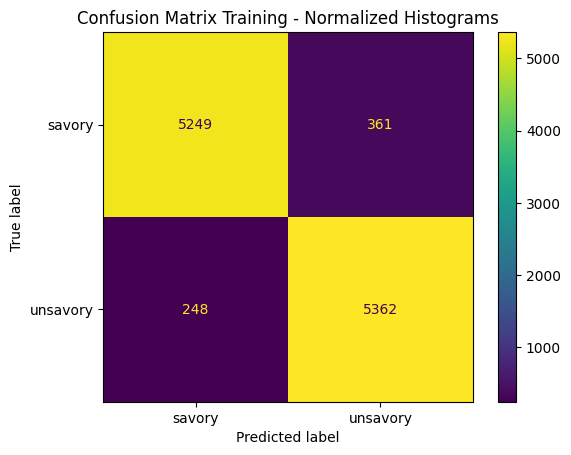

In [7]:
print(classification_report(labels, bovw.model.predict(train_hist)))

ConfusionMatrixDisplay.from_estimator(bovw.model, train_hist, labels)
plt.title("Confusion Matrix Training")
plt.show()

In [ ]:
print(classification_report(labels, bovw.knn.predict(train_hist)))

ConfusionMatrixDisplay.from_estimator(bovw.knn, train_hist, labels)
plt.title("Confusion Matrix Training")
plt.show()

In [ ]:
print(classification_report(labels, bovw.forest.predict(train_hist)))

ConfusionMatrixDisplay.from_estimator(bovw.forest, train_hist, labels)
plt.title("Confusion Matrix Training")
plt.show()

## Load after trainig for val phase

In [3]:
bovw = BOVW.load_model('./bovw/bovw.pkl')

Extracting SIFT from image ..\..\..\dataset\valid\unsavory\300.jpg...: 100%|██████████| 600/600 [00:23<00:00, 26.08it/s]


BOVW computed in: 3.285836599999996
Normalized Histogram - Test Accuracy: 0.8833333333333333


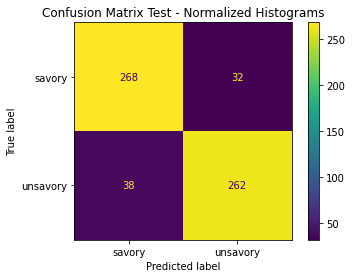

In [4]:
descr_val, labels_val, val_path = bovw.extract_Sifts(path_val, 'jpg')
histogram_val = bovw.compute_histogram(descr_val, labels_val)
predictions_val =  [i for i in bovw.model.predict(histogram_val)]

print(classification_report(labels_val, bovw.model.predict(histogram_val)))

ConfusionMatrixDisplay.from_estimator(bovw.model, histogram_val, labels_val)
plt.title("Confusion Matrix Validation")
plt.show()

In [ ]:
print(classification_report(labels_val, bovw.knn.predict(histogram_val)))

ConfusionMatrixDisplay.from_estimator(bovw.knn, histogram_val, labels_val)
plt.title("Confusion Matrix Validation")
plt.show()

In [ ]:
print(classification_report(labels_val, bovw.forest.predict(histogram_val)))

ConfusionMatrixDisplay.from_estimator(bovw.forest, histogram_val, labels_val)
plt.title("Confusion Matrix Validation")
plt.show()

## Load after training for test phase

In [ ]:
bovw = BOVW.load_model('./bovw/bovw.pkl')

Extracting SIFT from image ..\..\..\dataset\test\unsavory\300.jpg...: 100%|██████████| 600/600 [00:06<00:00, 86.23it/s]


BOVW computed in: 1.4668564999992668
Normalized Histogram - Test Accuracy: 0.9233333333333333


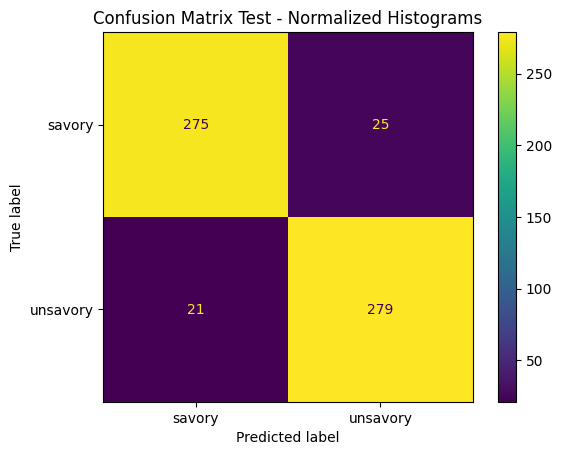

In [9]:
descr_test, labels_test, test_path = bovw.extract_Sifts(path_test, 'jpg')
histogram_test = bovw.compute_histogram(descr_test, labels_test)
predictions =  [i for i in bovw.model.predict(histogram_test)]

print(classification_report(labels_test, bovw.model.predict(histogram_test)))

ConfusionMatrixDisplay.from_estimator(bovw.model, histogram_test, labels_test)
plt.title("Confusion Matrix Test")
plt.show()

In [ ]:
print(classification_report(labels_test, bovw.knn.predict(histogram_test)))

ConfusionMatrixDisplay.from_estimator(bovw.knn, histogram_test, labels_test)
plt.title("Confusion Matrix Test")
plt.show()

In [ ]:
print(classification_report(labels_test, bovw.forest.predict(histogram_test)))

ConfusionMatrixDisplay.from_estimator(bovw.forest, histogram_test, labels_test)
plt.title("Confusion Matrix Test")
plt.show()

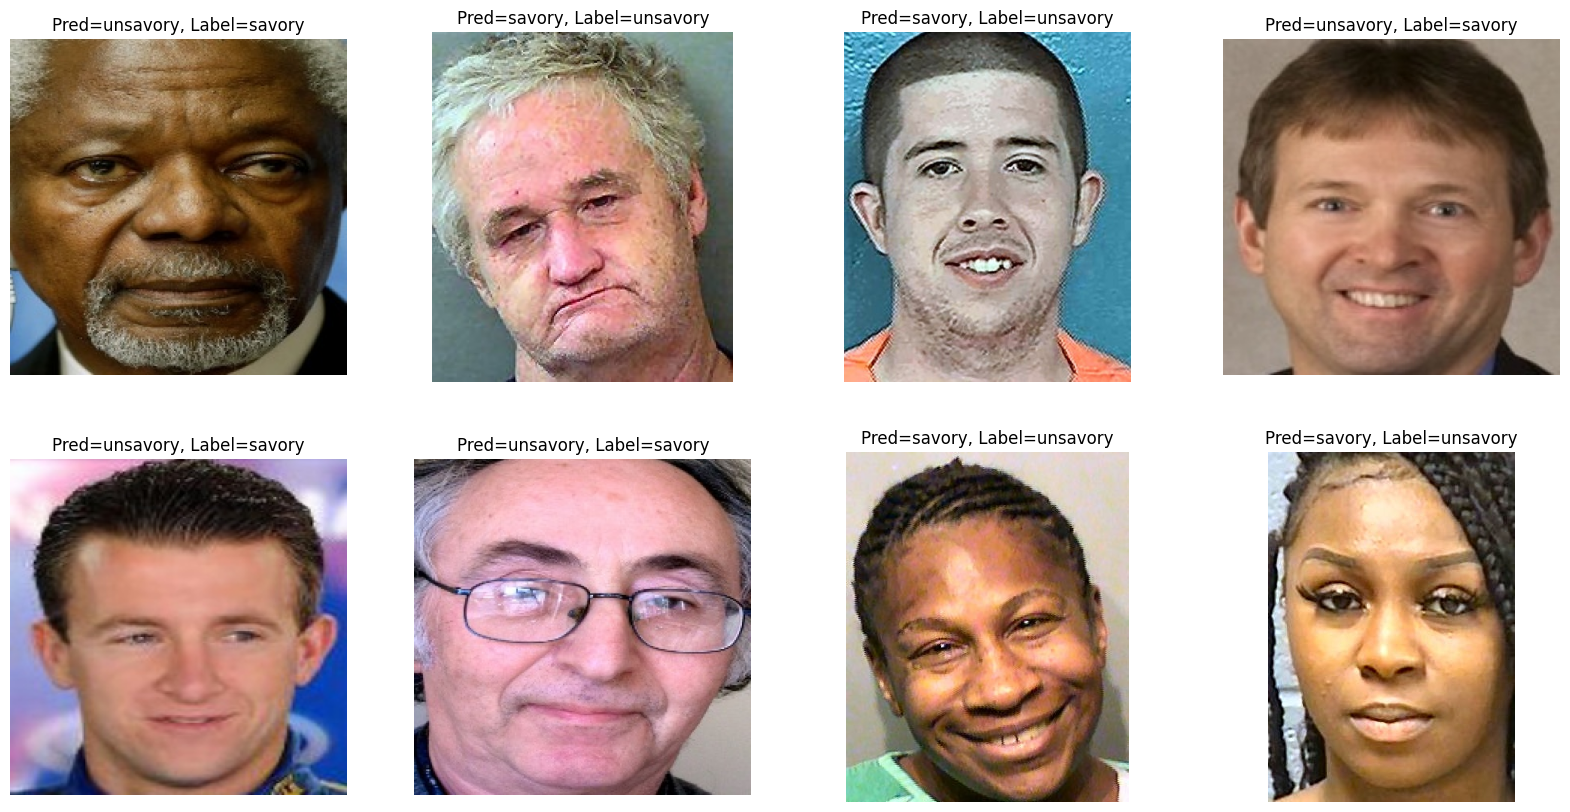

In [10]:
BOVW.show_results(bovw.model, histogram_test, labels_test, test_images_path, show_positive=False)

## CBIR from 0

In [5]:
for p in test_images_path:
    pred, k_similar = BOVW.cbir('./bovw/bovw.pkl', p, './bovw/train_bovw.pkl', './bovw/train_paths.pkl')
    print(pred)
    print(k_similar)
    break

BOVW computed in: 0.005396500000003357
KDTree computed in: 0.39075799999999106
10 most similar found in: 0.006468099999992205
['savory']
['..\\dataset\\train\\unsavory\\4164.jpg', '..\\dataset\\train\\savory\\3952.jpg', '..\\dataset\\train\\unsavory\\5263.jpg', '..\\dataset\\train\\unsavory\\2000.jpg', '..\\dataset\\train\\savory\\2144.jpg', '..\\dataset\\train\\savory\\3327.jpg', '..\\dataset\\train\\unsavory\\2569.jpg', '..\\dataset\\train\\savory\\2089.jpg', '..\\dataset\\train\\unsavory\\1226.jpg', '..\\dataset\\train\\unsavory\\1181.jpg']
